In [76]:
import matplotlib.pyplot as plt
TEST = 1000

# Grafos.
Los grafos son una estructura no lineal con gran relevancia en la acutualidad ya que pueden modelar una gran cantidad de problemas, generalmente con la determinacion de rutas.
# BFS.
Es un algoritmo que permite generar a partir de un nodo origen relaciones de gerarquia, utiles para implemetar rutas. La forma que funciona BFS es sencilla, si clasificamos a los nodos por la cantidad de saltos que se tienen que hacer desde el origen pues BFS se encarga de explorar todos los nodos de un mismo nivel para despues profundizar mas en ellos.

# <code>Classes</code>
## <code>Nodes</code>

In [77]:
class Node():
    def __init__(self, name):
        self.name = name
        self.neighbors = []
        self.father = None
        self.color = ""
    def AddNeighbor(self,neighbor):
        if neighbor in self.neighbors:
            return
        self.neighbors.append(neighbor)
    def __str__(self) -> str:
        return self.name

    def __repr__(self) -> str:
        return self.__str__()

class Node_Cost():
    def __init__(self, name):
        self.name = name
        self.neighbors = []
        self.father = None
        self.color = ""
        self.cost = 0

    def AddNeighbor(self,neighbor,cost):
        if neighbor in self.neighbors:
            return
        self.neighbors.append((neighbor,cost))

    def __str__(self) -> str:
        return self.name

    def __repr__(self) -> str:
        return self.__str__()

## <code>Undirected Graphs</code>
* No dirigido
* Sin costo

In [78]:
class UndirectedGraph():
    def __init__(self,listOfEdge) -> None:
        self.nodes = {}
        self.contT = 0
        self.contE = 1
        for edge in listOfEdge:
            node_1 = str(edge[0])
            node_2 = str(edge[1])
            if node_2 == "#":
                self.AddNode(node_1)
            else:
                if not node_1 in self.nodes:
                    self.nodes[node_1] = Node(node_1)
                if not node_2 in self.nodes:
                    self.nodes[node_2] = Node(node_2)
                self.AddEdge(node_1,node_2)
    def AddNode(self, nodeName:str):
        node = Node(nodeName)
        self.nodes[nodeName] = node
        return

    def AddEdge(self,node_1, node_2):
        if not node_1 in self.nodes:
            return
        if not node_2 in self.nodes:
            return
        node_1=self.nodes[node_1]
        node_2=self.nodes[node_2]
        if not node_2 in node_1.neighbors:
            node_1.AddNeighbor(node_2)
        if not node_1 in node_2.neighbors:
            node_2.AddNeighbor(node_1)
        return

    def BreathFirstSearch(self,orig:str):
        self.contT = 0
        if not orig in self.nodes:          #6
            return                          #1
        self.contE = 0
        for node in self.nodes.values():    #6(n+1)
            self.contT+=1
            node.father = None              #4n
            node.color = 'white'            #4n
        initialNode = self.nodes[orig]      #5
        initialNode.color = 'gray'          #3

        toExplore = []                      #4
        toExplore.append(initialNode)       #3
        contEsp = []
        contEsp.append(initialNode)
        while len(toExplore) > 0:           #5(n+1)
            nodeToVisit = toExplore.pop(0)  #5n
            for node in nodeToVisit.neighbors:  #5(m+1)
                self.contT+=1
                if node.color == 'white':       #5m
                    node.color = 'gray'         #4m
                    node.father = nodeToVisit   #4m
                    toExplore.append(node)      #3m
                    contEsp.append(node)
            nodeToVisit.color = 'black'         #4n
        self.contE = len(contEsp)
        return                                  #1
        #P(n,m)=28n+21m+34
    def getRouteBFS(self,ori_node,end_node):
        if not ori_node in self.nodes or not end_node in self.nodes:
            return
        self.BreathFirstSearch(ori_node)
        route = ''
        node = self.nodes[end_node]
        isLast = True
        while node != None:
            if isLast:
                route = node.name+' (Dest)'
                isLast = False
            else:
                route = node.name + ' -> ' + route
            node = node.father
        return '(Origen) '+route
    def __str__(self) -> str:
        s=''
        if len(self.nodes.keys()) == 0:
            return "{}"
        for nameNode in self.nodes.keys():
            s+=(nameNode+' -> '+str(self.nodes[nameNode].neighbors)+'\n')
        return s

# <code>Undirected Graph_cost</code>
* Peso en las arisistas
* No dirigido

In [79]:
class UndirectedGraph_Cost():
    def __init__(self,listOfEdge) -> None:
        self.nodes = {}
        self.contT = 0
        self.contE = 1
        for edge in listOfEdge:
            node_1 = str(edge[0])
            node_2 = str(edge[1])
            cost = edge[2]
            if node_2 == "#":
                self.AddNode(node_1,)
            else:
                if not node_1 in self.nodes:
                    self.nodes[node_1] = Node_Cost(node_1)
                if not node_2 in self.nodes:
                    self.nodes[node_2] = Node_Cost(node_2)
                self.AddEdge(node_1,node_2,cost)
    def AddNode(self, nodeName:str):
        node = Node_Cost(nodeName)
        self.nodes[nodeName] = node
        return

    def AddEdge(self,nameNode_1, nameNode_2,cost):
        if not nameNode_1 in self.nodes:
            return
        if not nameNode_2 in self.nodes:
            return
        node_1 =self.nodes[nameNode_1]
        node_2 =self.nodes[nameNode_2]
        node_1.AddNeighbor(node_2,cost)
        node_2.AddNeighbor(node_1,cost)
        return

    def BreathFirstSearch(self,orig:str):
        if not orig in self.nodes:                  #6
            return                                  #1
        self.contT=0
        self.contE = 0
        for node in self.nodes.values():            #6(n+1)
            self.contT+=1
            node.father = None                      #4n
            node.color = 'white'                    #4n
        initialNode = self.nodes[orig]              #5
        initialNode.color = 'gray'                  #3
        toExplore =[]                               #4
        toExplore.append(initialNode)               #3
        contEsp = []
        contEsp.append(initialNode)
        while len(toExplore) > 0:                       #5(n+1)
            nodeToVisit = toExplore.pop(0)              #5n
            for node in nodeToVisit.neighbors:          #5(m+1)
                self.contT+=1
                if node[0].color == 'white':            #6m
                    node[0].color = 'gray'              #5m
                    node[0].father = nodeToVisit        #5m
                    node[0].cost = node[1]              #4m
                    toExplore.append(node[0])           #4m
                    contEsp.append(node[0])
            nodeToVisit.color = 'black'                 #4n
        self.contE = len(contEsp)
        return                                          #1
        #P(n,m)=28n+29m+39
    def getRouteBFS(self,ori_node,end_node):
        if not end_node in self.nodes:
            return
        self.BreathFirstSearch(ori_node)
        cost = 0
        route = ''
        node = self.nodes[end_node]
        isLast = True
        while node != None:
            cost += node.cost
            if isLast:
                route = node.name+' (Dest) '
                isLast = False
            else:
                route = node.name + ' -> ' + route
            node = node.father
        return '(Origen) '+route + "cost: "+str(cost)

    def __str__(self) -> str:
        s=''
        for nameNode in self.nodes.keys():
            s+=(nameNode+' -> '+str(self.nodes[nameNode].neighbors)+'\n')
        return s


## <code>Directed Graphs</code>
* Aristas dirigidas
* Sin costo

In [80]:
class DirectedGraph():
    def __init__(self,listOfEdges) -> None:
        self.nodes = {}
        self.contT = 0
        self.contE = 1
        for edge in listOfEdges:
            node_1 = str(edge[0])
            node_2 = str(edge[1])
            if node_2 == "#":
                self.AddNode(node_1)
                continue
            if not node_1 in self.nodes:
                self.nodes[node_1]=Node(node_1)
            if not node_2 in self.nodes:
                self.nodes[node_2]=Node(node_2)
            self.AddEdge(node_1,node_2)
    def AddNode(self, nodeName:str):
        node = Node(nodeName)
        self.nodes[nodeName] = node
        return
    #n_1->n_2
    def AddEdge(self,nameNode_1, nameNode_2):
        if not nameNode_1 in self.nodes:
            return
        if not nameNode_2 in self.nodes:
            return
        node_1 =self.nodes[nameNode_1]
        node_2 =self.nodes[nameNode_2]
        node_1.AddNeighbor(node_2)
        return

    def BreathFirstSearch(self,orig:str):
        if not orig in self.nodes:                          #6
            return                                          #1
        self.contT=0
        self.contE = 0
        for node in self.nodes.values():                    #6(n+1)
            self.contT+=1
            node.father = None                              #4n
            node.color = 'white'                            #4n
        initialNode = self.nodes[orig]                      #5
        initialNode.color = 'gray'                          #5

        toExplore =[]                                       #4
        toExplore.append(initialNode)                       #3
        contEsp = []
        contEsp.append(initialNode)
        while len(toExplore) > 0:                           #5(n+1)
            nodeToVisit = toExplore.pop(0)                  #5n
            for node in nodeToVisit.neighbors:              #5(m+1)
                self.contT+=1
                if node.color == 'white':                   #5m
                    node.color = 'gray'                     #4m
                    node.father = nodeToVisit               #3m
                    toExplore.append(node)
                    contEsp.append(node)
            nodeToVisit.color = 'black'                     #4n
        self.contE = len(contEsp)
        return                                              #1
        #P(n,m)=28n+21m+34
    def getRouteBFS(self,ori_node,end_node):
        if not ori_node in self.nodes or not end_node in self.nodes:
            return
        self.BreathFirstSearch(ori_node)
        route = ''
        node = self.nodes[end_node]
        isLast = True
        while node != None:
            if isLast:
                route = node.name+' (Dest)'
                isLast = False
            else:
                route = node.name + ' -> ' + route
            node = node.father
        return '(Origen) '+route

    def __str__(self) -> str:
        s=''
        for nameNode in self.nodes.keys():
            s+=(nameNode+' -> '+str(self.nodes[nameNode].neighbors)+'\n')
        return s

## <code>Directed Graph_cost</code>
* Con peso en las aristas
* Aristas dirigidas

In [81]:
class DirectedGraph_Cost():
    def __init__(self,listOfEdges) -> None:
        self.nodes = {}
        self.contT = 0
        self.contE = 1
        for edge in listOfEdges:
            node_1 = str(edge[0])
            node_2 = str(edge[1])
            cost = edge[2]
            if node_2 == "#":
                self.AddNode(node_1)
                continue
            else:
                if not node_1 in self.nodes:
                    self.nodes[node_1] = Node_Cost(node_1)
                if not node_2 in self.nodes:
                    self.nodes[node_2] = Node_Cost(node_2)
                self.AddEdge(node_1,node_2,cost)
    def AddNode(self, nodeName:str):
        node = Node_Cost(nodeName)
        self.nodes[nodeName] = node
        return
    #n_1->n_2
    def AddEdge(self,nameNode_1, nameNode_2,cost):
        if not nameNode_1 in self.nodes:
            return
        if not nameNode_2 in self.nodes:
            return
        node_1 =self.nodes[nameNode_1]
        node_2 =self.nodes[nameNode_2]
        node_1.AddNeighbor(node_2,cost)
        return

    def BreathFirstSearch(self,orig:str):
        if not orig in self.nodes:                  #6
            return                                  #1
        self.contT = 0
        for node in self.nodes.values():            #6(n+1)
            self.contT +=1
            node.father = None                      #4n
            node.color = 'white'                    #4n
        initialNode = self.nodes[orig]              #5
        initialNode.color = 'gray'                  #3

        toExplore = []                              #4
        toExplore.append(initialNode)               #3
        contEsp = []
        contEsp.append(initialNode)
        while len(toExplore) > 0:                   #5(n+1)
            nodeToVisit = toExplore.pop(0)          #5n
            for node in nodeToVisit.neighbors:      #5(m+1)
                self.contT +=1
                if node[0].color == 'white':        #6m
                    node[0].color = 'gray'          #5m
                    node[0].father = nodeToVisit    #5m
                    node[0].cost = node[1]          #4m
                    toExplore.append(node[0])       #4m
                    contEsp.append(node[0])
            nodeToVisit.color = 'black'             #4n
        self.contE = len(contEsp)
        return                                      #1
        #P(n,m)=28n+29m+39

    def getRouteBFS(self,ori_node,end_node):
        if not end_node in self.nodes:
            return
        self.BreathFirstSearch(ori_node)
        cost = 0
        route = ''
        node = self.nodes[end_node]
        isLast = True
        while node != None:
            cost += node.cost
            if isLast:
                route = node.name+' (Dest) '
                isLast = False
            else:
                route = node.name + ' -> ' + route
            node = node.father
        return '(Origen) '+route + "cost: "+str(cost)

    def __str__(self) -> str:
        s=''
        for nameNode in self.nodes.keys():
            s+=(nameNode+' -> '+str(self.nodes[nameNode].neighbors)+'\n')
        return s

In [82]:
from random import randint
def worstCase(n):
    listOfEdges = []
    i=0
    while i<n:
        j=i+1
        while j < n:
            listOfEdges.append((i,j))
            j+=1
            pass
        i+=1
    return listOfEdges
def betterCase(n):
    listOfEdges = []
    i=0
    while i<n:
        listOfEdges.append((i,"#"))
        i+=1
    return listOfEdges
def averageCase(n):
    listOfEdges = []
    i = 0
    while i<n:
        j=i+randint(1,n-i)
        while j < randint(j,n):
            listOfEdges.append((i,j))
            j+=1
            pass
        i+=1
    return listOfEdges
def worstCaseD(n):
    listOfEdges = []
    i=0
    while i<n:
        j=i+1
        while j < n:
            listOfEdges.append((i,j))
            listOfEdges.append((j,i))
            j+=1
            pass
        i+=1
    return listOfEdges
def averageCaseD(n):
    listOfEdges = []
    i = 0
    while i<n:
        j=i+randint(1,n-i)
        while j < n:
            a = randint(1,3)
            if a==1:
                listOfEdges.append((i,j))
                if randint(0,1)==0:
                    listOfEdges.append((j,i))
            elif a==2:
                listOfEdges.append((j,i))
                if randint(0,1)==0:
                    listOfEdges.append((i,j))
            j+=1
        i+=1
    return listOfEdges
def worstCaseC(n):
    listOfEdges = []
    i=0
    while i<n:
        j=i+1
        while j < n:
            listOfEdges.append((i,j,randint(-1000,1000)))
            j+=1
            pass
        i+=1
    return listOfEdges

def betterCaseC(n):
    listOfEdges = []
    i=0
    while i<n:
        listOfEdges.append((i,"#",0))
        i+=1
    return listOfEdges
def averageCaseC(n):
    listOfEdges = []
    i = 0
    while i<n:
        j=i+randint(1,n-i)
        while j < randint(j,n):
            listOfEdges.append((i,j,randint(-1000,1000)))
            j+=1
            pass
        i+=1
    return listOfEdges
def worstCaseDC(n):
    listOfEdges = []
    i=0
    while i<n:
        j=i+1
        while j < n:
            cost = randint(-1000,1000)
            listOfEdges.append((i,j,cost))
            listOfEdges.append((j,i,cost))
            j+=1
            pass
        i+=1
    return listOfEdges
def averageCaseDC(n):
    listOfEdges = []
    i = 0
    while i<n:
        j=i+randint(1,n-i)
        while j < n:
            a = randint(1,3)
            cost = randint(-1000,1000)
            if a==1:
                listOfEdges.append((i,j,cost))
                if randint(0,1)==0:
                    listOfEdges.append((j,i,cost))
            elif a==2:
                listOfEdges.append((j,i,cost))
                if randint(0,1)==0:
                    listOfEdges.append((i,j,cost))
            j+=1
        i+=1
    return listOfEdges

# BFS-Grafos-No dirigidos-Sin Costo.
## Análisis de Complejidad Temporal.
### Peor Caso.
Si $G$ es un grafo completo, es decir, todos sus nodos estan conectados con todos entonces en la primera iteración que parte desde el nodo inicial pintará a los $n-1$ nodos restantes en gris por lo que en posteriores iteraciones no serán encolados lo cual, garantiza que el primer ciclo se ejecuta $n+1$ veces. Como cada nodo está conetado con todos los restantes, la lista de adyacencia tendrá una longitud de $n-1$ que en última instancia provoca una complidad cuadrática.
$$\mathcal{O}(n^2)$$

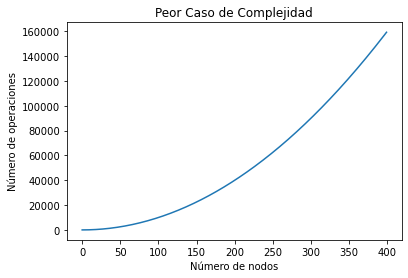

In [83]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph(worstCase(n))
    ug.BreathFirstSearch("0")
    Y.append(ug.contT)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

### Mejor Caso de Complejidad.
Si es que nuestro grafo $G$ no posee ninguna arista, entonces la cola tendrá como máximo un elemento que es el propio nodo desde el cual comienza la exploración, por lo que la complejidad se reduce a $n$ donde $n$ es la cantidad de nodos.


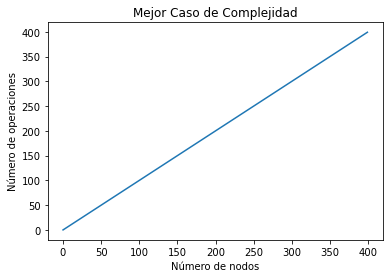

In [84]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph(betterCase(n))
    ug.BreathFirstSearch("0")
    Y.append(ug.contT)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

## Caso Promedio.
Cuando nuestro grafo tiene $n$ nodos y $m$ aristas entonces explorar los nodos bajo BFS será:
$$\theta(n+m)$$

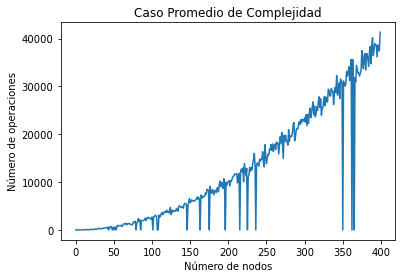

In [85]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph(averageCase(n))
    ug.BreathFirstSearch("0")
    Y.append(ug.contT)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

# BFS-Grafos-No dirigidos-Con Costo.
## Análisis de Complejidad Temporal.
### Peor Caso.
En este caso la peor complejidad se vuelve a dar cuando todos los nodos están conectados entre si y sus listas de adyacencia tienen una longitud de $n-1$, es por esto que la complejidad sigue siendo:
$$\mathcal{O}(n^2)$$

In [86]:
X = range(TEST)
Y = []
for n in X:
    ugc = UndirectedGraph_Cost(worstCaseC(n))
    ugc.BreathFirstSearch("0")
    Y.append(ugc.contT)
plt.title("Peor de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

KeyboardInterrupt: 

### Mejor Caso.
Cuando el nodo del cual vamos a iniciar la exploración es un nodo aislado entonces la complejidad será solo de $n$ ya que es la cantidad de nodos que tenemos.
$$\Omega(n)$$

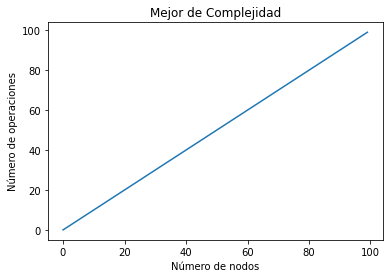

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ugc = UndirectedGraph_Cost(betterCaseC(n))
    ugc.BreathFirstSearch("0")
    Y.append(ugc.contT)
plt.title("Mejor de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

### Caso Promedio.
Cuando nuestro grafo tiene $n$ nodos y $m$ aristas entonces la complejidad de BFS será:
$$\theta(n+m)$$
porque algunos nodos estarán conectados entre si pero algunos otros estarán aislados.

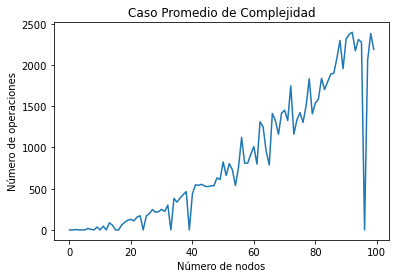

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ugc = UndirectedGraph_Cost(averageCaseC(n))
    ugc.BreathFirstSearch("0")
    Y.append(ugc.contT)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

# BFS-Grafos-Dirigidos-Sin Costo.
## Análisis de Complejidad Temporal.
### Peor Caso.
El peor caso se vuelve a dar cuando todos los nodos están conectados entre si en ambas direcciones por lo que sus listas de adyacencia siguen teniendo una longitud de $n-1$, por eso  la complejidad sigue siendo:
$$\mathcal{O}(n^2)$$

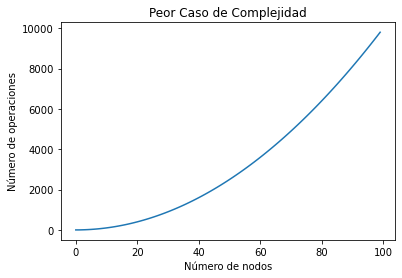

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph(worstCaseD(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contT)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

### Mejor Caso.
La complejidad temporal será lineal ya que al solo tener nodos aislados la complejidad será $n$ ya que es la cantidad de nodos que tenemos:
$$\Omega(n)$$

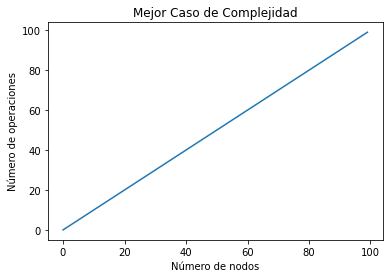

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph(betterCase(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contT)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

### Caso Promedio.
Cuando nuestro grafo tiene $n$ nodos y $m$ aristas entonces la complejidad de BFS será:
$$\theta(n+m)$$
porque algunos nodos estarán conectados entre si pero algunos otros estarán aislados.

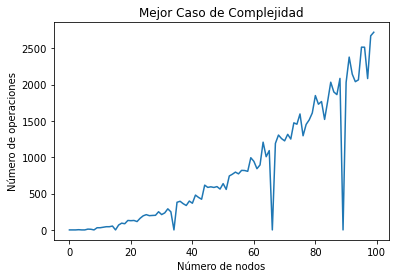

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph(averageCaseD(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contT)
plt.title("Caso Promedios de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

# BFS-Grafos-Dirigidos-Con Costo.
## Análisis de Complejidad Temporal.
### Peor Caso.
El peor caso ocurre cuando todos los nodos están conectados entre si en ambas direcciones por lo que nos da una complejidad:
$$\mathcal{O}(n^2)$$

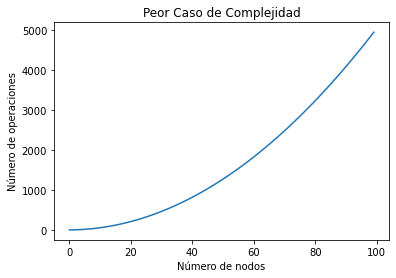

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph_Cost(worstCaseC(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contT)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

### Mejor Caso.
En el mejor caso todos los nodos están aislados y esto da como resultado que la complejidad será $n$ por la cantidad de nodos que tenemos:
$$\Omega(n)$$

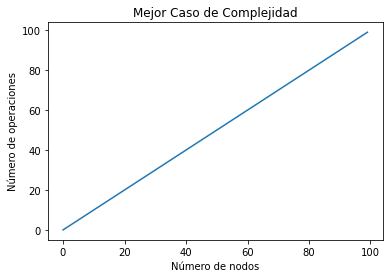

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph_Cost(betterCaseC(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contT)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

### Caso de Promedio.
En este caso el grafo tiene $n$ nodos y $m$ aristas ya sea en 1 o ambas direcciones por lo que la complejidad será:
$$\theta(n+m)$$
aunque sigan habiendo nodos aislados.

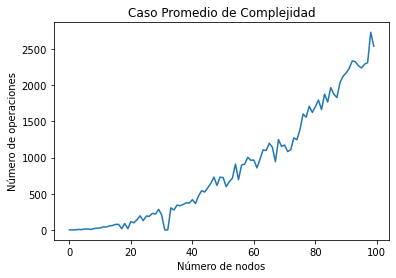

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph_Cost(averageCaseDC(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contT)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Número de operaciones")
plt.plot(X,Y)

# BFS-Grafos-No dirigidos-Sin Costo.
## Análisis de Complejidad Espacial.
### Mejor Caso
El mejor caso ocurriría cuando tenemos un nodo aislado por lo que la complejidad espacial solo sería de 1 al estar revisando un nodo sin vecinos:
$$Space(1)$$

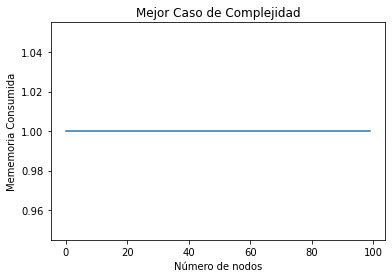

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph(betterCase(n))
    ug.BreathFirstSearch("0")
    Y.append(ug.contE)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Mememoria Consumida")
plt.plot(X,Y)

### Peor Caso
En el peor caso tenemos un grafo completo con una cantidad $n$ de nodos por revisar por lo que la complejidad será:
$$Space(n)$$

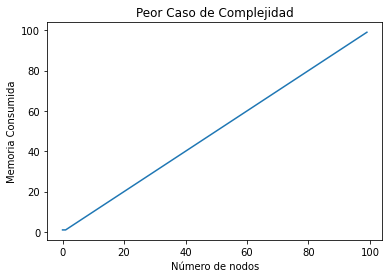

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph(worstCase(n))
    ug.BreathFirstSearch("0")
    Y.append(ug.contE)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Caso promedio.
En el caso promedio algunos nodos están aislados y usaremos $k$ para representar la cantidad de estos, entonces $s=n-k$ donde $s$ serán lo nodos que podamos explorar, sin embargo siempre se cumple que $s<n$ por lo que la complejidad queda como:
$$Space(n)$$

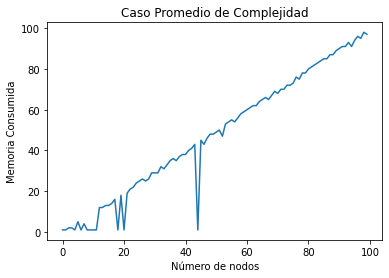

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph(averageCase(n))
    ug.BreathFirstSearch(str(randint(0,n)))
    Y.append(ug.contE)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

# BFS-Grafos-Sin dirección-con Costo.
## Análisis de Complejidad Espacial.
### Mejor Caso.
El mejor caso nuevamente ocurre cuando tenemos un nodo aislado por lo que la complejidad será constante:
$$Space(1)$$

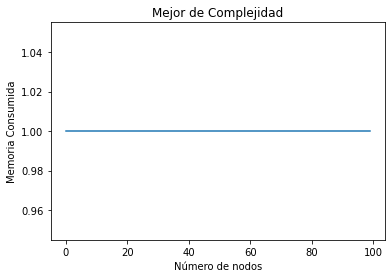

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ugc = UndirectedGraph_Cost(betterCaseC(n))
    ugc.BreathFirstSearch("0")
    Y.append(ugc.contE)
plt.title("Mejor de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Peor Caso
En el peor caso tenemos un grafo completo con una cantidad $n$ de nodos por lo que la complejidad será:
$$Space(n)$$

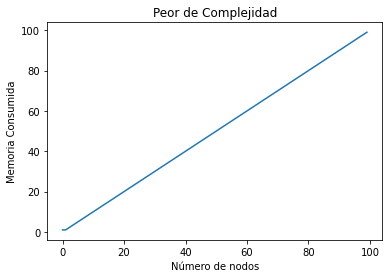

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ugc = UndirectedGraph_Cost(worstCaseC(n))
    ugc.BreathFirstSearch("0")
    Y.append(ugc.contE)
plt.title("Peor de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Caso promedio.
En el caso promedio algunos nodos están aislados y algunos están conectados entre si por lo que la complejidad es:
$$Space(n)$$
y podemos tener caidas hasta 1 cuando encontramos un nodo aislado.

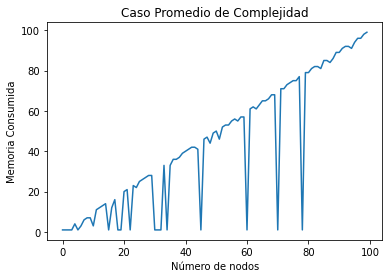

In [ ]:
X = range(TEST)
Y = []
for n in X:
    ug = UndirectedGraph_Cost(averageCaseC(n))
    ug.BreathFirstSearch("0")
    Y.append(ug.contE)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

# BFS-Con Dirección-sin Costo
## Análisis de Complejidad Espacial.
### Mejor Caso.
El mejor caso ocurre cuando tenemos un nodo aislado por lo que la complejidad será constante al no tener vecinos:
$$Space(1)$$

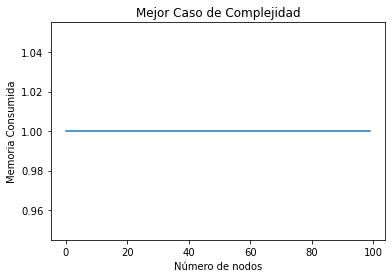

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph(betterCase(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contE)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Peor Caso
En un grafo completo con una cantidad $n$ de nodos creamos la lista de todos los nodos por lo que la complejidad será:
$$Space(n)$$

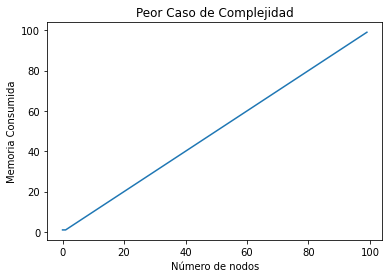

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph(worstCaseD(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contE)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Caso promedio.
En el caso promedio tenemos nodos están aislados y nodos conectados entre si por lo que la complejidad es:
$$Space(n)$$
y pueden haber caidas hasta 1 cuando tenemos un nodo aislado.

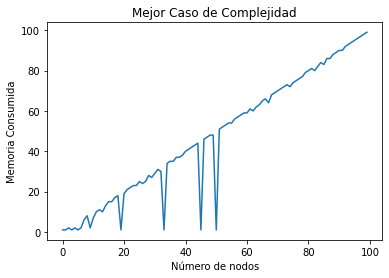

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph(averageCaseD(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contE)
plt.title("Caso promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

# BFS-Grafos-Con Dirección-Con Costo.
## Análisis de Complejidad Espacial.
### Mejor Caso.
Cuando hay un nodo aislado tenemos una lista del nodo por lo que la complejidad será constante al no tener vecinos:
$$Space(1)$$

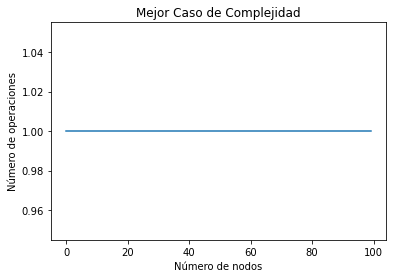

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph_Cost(betterCaseC(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contE)
plt.title("Mejor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Peor Caso
En un grafo completo tenemos una cantidad $n$ de nodos unidos entre si, por lo que la complejidad será:
$$Space(n)$$

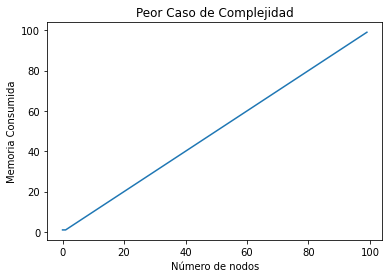

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph_Cost(worstCaseC(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contE)
plt.title("Peor Caso de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)

### Caso promedio.
En el caso promedio nuevamente tenemos nodos aislados y nodos conectados entre si por lo que la complejidad es:
$$Space(n)$$
y pueden haber caidas hasta 1 cuando hay un nodo aislado.

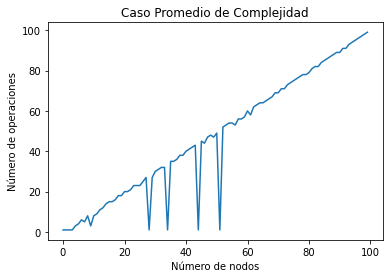

In [ ]:
X = range(TEST)
Y = []
for n in X:
    dg = DirectedGraph_Cost(averageCaseDC(n))
    dg.BreathFirstSearch("0")
    Y.append(dg.contE)
plt.title("Caso Promedio de Complejidad")
plt.xlabel("Número de nodos")
plt.ylabel("Memoria Consumida")
plt.plot(X,Y)